In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive');
base_dir = ""

Mounted at /content/drive


## **Features**

In [3]:
# load users data
users = pd.read_csv(base_dir + "users.csv")
users.head()

,userid,segment,motivation,age
0,u-1,s1,m1,20
1,u-2,s1,m1,20
2,u-3,s1,m1,32
3,u-4,s1,m2,32
4,u-5,s2,m2,40


In [4]:
# load task data
tasks = pd.read_csv(base_dir + "tasks.csv")
tasks.head()

,taskid,segment,motivation,domain
0,1,s1,m1,d1
1,2,s1,m1,d1
2,3,s1,m1,d2
3,4,s1,m1,d2
4,5,s2,m2,d3


In [5]:
# load user_task data
userTasks = pd.read_csv(base_dir + "user_tasks.csv")
userTasks.head()

,userid,taskid,completed
0,u-1,1,0
1,u-1,2,0
2,u-1,3,1
3,u-1,4,1
4,u-1,265,0


### Join users and tasks

In [6]:
#join users and tasks
userTasksFeature = pd.merge(users, tasks, left_on=['segment', 'motivation'], right_on=['segment', 'motivation'], how='outer')
userTasksFeature

,userid,segment,motivation,age,taskid,domain
0,u-1,s1,m1,20.0,1,d1
1,u-1,s1,m1,20.0,2,d1
2,u-1,s1,m1,20.0,3,d2
3,u-1,s1,m1,20.0,4,d2
4,u-1,s1,m1,20.0,265,d1
...,...,...,...,...,...,...
4191,NaN,s10,m5,NaN,260,d4
4192,NaN,s11,m6,NaN,261,d5
4193,NaN,s11,m6,NaN,262,d5
4194,NaN,s11,m6,NaN,263,d6


### Join the result with user-tasks

In [7]:
userTaskStatusFeature = pd.merge(userTasksFeature, userTasks, left_on=['userid', 'taskid'], right_on=['userid', 'taskid'], how='outer')
userTaskStatusFeature

,userid,segment,motivation,age,taskid,domain,completed
0,u-1,s1,m1,20.0,1,d1,0.0
1,u-1,s1,m1,20.0,2,d1,0.0
2,u-1,s1,m1,20.0,3,d2,1.0
3,u-1,s1,m1,20.0,4,d2,1.0
4,u-1,s1,m1,20.0,265,d1,0.0
...,...,...,...,...,...,...,...
4191,NaN,s10,m5,NaN,260,d4,NaN
4192,NaN,s11,m6,NaN,261,d5,NaN
4193,NaN,s11,m6,NaN,262,d5,NaN
4194,NaN,s11,m6,NaN,263,d6,NaN


In [8]:
userTaskStatusFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userid      3832 non-null   object 
 1   segment     4196 non-null   object 
 2   motivation  4196 non-null   object 
 3   age         3832 non-null   float64
 4   taskid      4196 non-null   int64  
 5   domain      4196 non-null   object 
 6   completed   3832 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 229.6+ KB


In [31]:
# replaceStruct = {
#                   "segment": {"s1": 1, "s2": 2 ,"s3": 3},
#                   "motivation": {"m1": 1, "m2":2 , "m3": 3, "m4": 4},
#                   "category": {"cat1": 1, "cat2":2 , "cat3": 3}
#                 }
# oneHotCols=[]

In [32]:
# userTaskStatusFeature=userTaskStatusFeature.replace(replaceStruct)
# userTaskStatusFeature.head(10)

In [10]:
userTaskStatusFeature.head(5)

,userid,segment,motivation,age,taskid,domain,completed
0,u-1,s1,m1,20.0,1,d1,0.0
1,u-1,s1,m1,20.0,2,d1,0.0
2,u-1,s1,m1,20.0,3,d2,1.0
3,u-1,s1,m1,20.0,4,d2,1.0
4,u-1,s1,m1,20.0,265,d1,0.0


In [11]:
#handle missing values
userTaskStatusFeature["domain"].fillna('d1', inplace=True)
userTaskStatusFeature["motivation"].fillna('m1', inplace=True)
userTaskStatusFeature["segment"].fillna('s1', inplace=True)
userTaskStatusFeature["completed"].fillna(0, inplace=True)
userTaskStatusFeature["age"].fillna(20, inplace=True)

In [12]:
userTaskStatusFeatureCopy = userTaskStatusFeature.copy()

In [14]:
#drop taskid and userid
userTaskStatusFeatureCopy.drop(['taskid', 'userid'], axis=1, inplace=True)

In [36]:
userTaskStatusFeatureCopy.head(5)

,userid,segment,motivation,age,taskid,domain,completed
0,u-1,s1,m1,20.0,1,d1,0.0
1,u-1,s1,m1,20.0,2,d1,0.0
2,u-1,s1,m1,20.0,3,d2,1.0
3,u-1,s1,m1,20.0,4,d2,1.0
4,u-1,s1,m1,20.0,265,d1,0.0


## Split Data

In [15]:
X = userTaskStatusFeatureCopy.drop("completed" , axis=1)
y = userTaskStatusFeatureCopy.pop("completed")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

##Build Model

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring

In [ ]:
print("Accuracy on training set : ",model.score(X_train, y_train))
print("Accuracy on test set : ",model.score(X_test, y_test))

Accuracy on training set :  0.75
Accuracy on test set :  0.8


In [ ]:
#Checking number of positives
y.value_counts(1)

completed
0.0    0.761905
1.0    0.238095
Name: proportion, dtype: float64

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

## Confusion Matrix

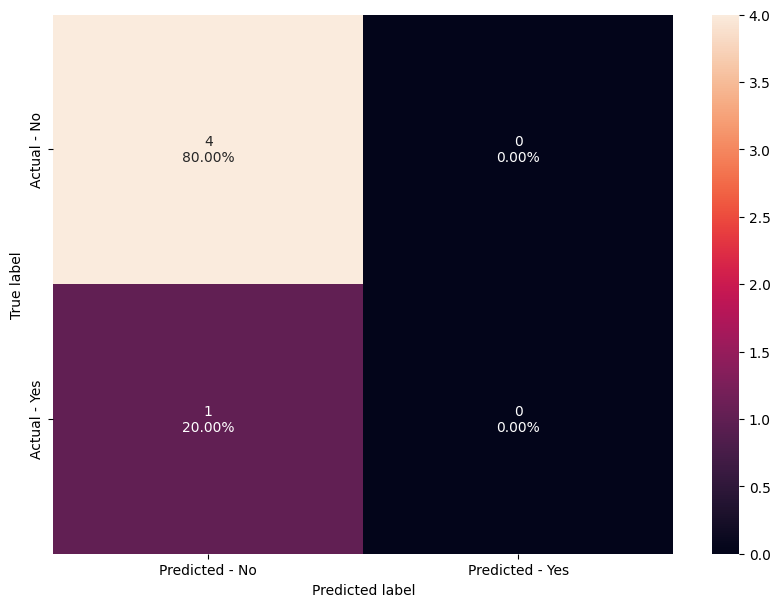

In [ ]:
make_confusion_matrix(model,y_test)

In [ ]:
get_recall_score(model)

Recall on training set :  0.0
Recall on test set :  0.0


##Getting Predictions

In [ ]:
userTaskStatusFeature

,userId,segment,motivation,age,taskId,category,completed
0,u1,1.0,1.0,20.0,t1,1.0,1.0
1,u1,1.0,1.0,20.0,t5,3.0,0.0
2,u2,2.0,2.0,50.0,t3,3.0,0.0
3,u3,2.0,3.0,35.0,NaN,1.0,0.0
4,u4,1.0,4.0,45.0,NaN,1.0,0.0
5,NaN,1.0,2.0,20.0,t2,2.0,0.0
6,NaN,3.0,3.0,20.0,t4,1.0,0.0
7,u1,1.0,1.0,20.0,t2,1.0,0.0
8,u1,1.0,1.0,20.0,t3,1.0,0.0
9,u1,1.0,1.0,20.0,t4,1.0,0.0


In [ ]:
#set the user
user = 'u4'

userFeatureSet = userTaskStatusFeature[userTaskStatusFeature.userId == user]
userFeatureSet

,userId,segment,motivation,age,taskId,category,completed
4,u4,1.0,4.0,45.0,NaN,1.0,0.0
17,u4,1.0,1.0,20.0,t1,1.0,0.0
18,u4,1.0,1.0,20.0,t2,1.0,0.0
19,u4,1.0,1.0,20.0,t3,1.0,1.0
20,u4,1.0,1.0,20.0,t4,1.0,1.0


In [ ]:
userFeatureSetCopy = userFeatureSet
userFeatureSetCopy.drop(['userId', 'taskId', 'completed'], axis=1, inplace=True)

<ipython-input-264-d190923b3b32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userFeatureSetCopy.drop(['userId', 'taskId', 'completed'], axis=1, inplace=True)


In [ ]:
predictions = model.predict(userFeatureSet)
predictions

array([0., 0., 0., 0., 0.])